### Este notebook se concentra em compilar os resultados de simulações das implementações do algoritmo KNN sem e com a utilização de tecnicas de feature scaling

In [1]:
#importação das bibliotecas
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, root_mean_squared_error

In [1]:
from utils.utils import *

#### Implementações sem utilização de feature scaling

In [4]:
df = pd.read_csv(r'data\opticalnetwork_dataset.csv')
df.shape

(50488, 25)

array([[<Axes: title={'center': 'NumCh'}>,
        <Axes: title={'center': 'NumSpans'}>,
        <Axes: title={'center': 'DispPar'}>],
       [<Axes: title={'center': 'Spans_gamma'}>,
        <Axes: title={'center': 'Spans_beta2'}>,
        <Axes: title={'center': 'Spans_alpha'}>],
       [<Axes: title={'center': 'Spans_L'}>,
        <Axes: title={'center': 'Spans_PdBmCh'}>, <Axes: >]], dtype=object)

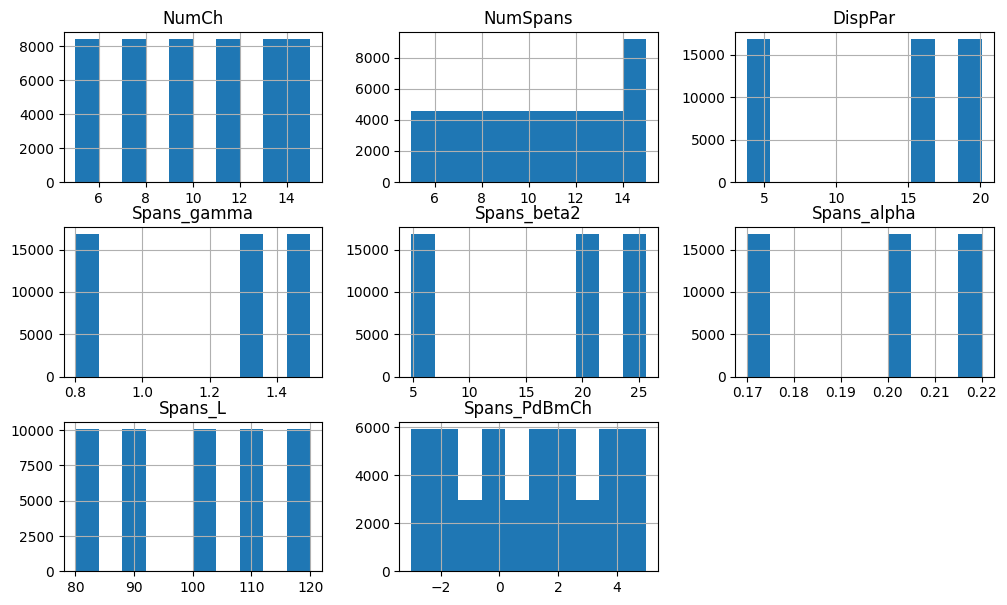

In [4]:
df[['NumCh', 'NumSpans', 'DispPar', 'Spans_gamma', 'Spans_beta2', 'Spans_alpha', 'Spans_L', 'Spans_PdBmCh']].hist(figsize=(12,7))

In [5]:
for channel in string_features:
  for key in coef_mod.keys():
    df[f'coef_mod_{channel}_{key}'] = df[channel].apply(lambda x: coef_mod[key][x])

In [6]:
osnr_label = r'$\mathrm{OSNR}_{\mathrm{NL}}$'
nlin_label = r'$\mathrm{NLIN}_{\mathrm{Power}}$'

In [7]:
df.Spans_Fn = df.Spans_Fn.apply(lambda x: 10*np.log10(x))

In [8]:
features = [feature for feature in df.columns if feature not in output_features+zero_features+string_features+const_input_features]

In [11]:
df_knn = df.copy()
X_features = df_knn[features].drop(columns=coef_mod0)
y_features = df_knn[output_features]
X_features.head()

,NumCh,NumSpans,DispPar,Spans_gamma,Spans_beta2,Spans_alpha,Spans_L,Spans_PdBmCh,coef_mod_Spans_ModFormatCh_1,coef_mod_Spans_ModFormatIntLeft_1,coef_mod_Spans_ModFormatIntRight_1
0,5,5,16.7,1.3,21.299985,0.2,80,-3.0,0.25,0.25,0.25
1,5,5,16.7,1.3,21.299985,0.2,80,-2.5,0.25,0.25,0.25
2,5,5,16.7,1.3,21.299985,0.2,80,-2.0,0.25,0.25,0.25
3,5,5,16.7,1.3,21.299985,0.2,80,-1.5,0.25,0.25,0.25
4,5,5,16.7,1.3,21.299985,0.2,80,-1.0,0.25,0.25,0.25


In [17]:
X_features.shape

(50488, 11)

array([[<Axes: title={'center': 'NumCh'}>,
        <Axes: title={'center': 'NumSpans'}>,
        <Axes: title={'center': 'DispPar'}>],
       [<Axes: title={'center': 'Spans_gamma'}>,
        <Axes: title={'center': 'Spans_beta2'}>,
        <Axes: title={'center': 'Spans_alpha'}>],
       [<Axes: title={'center': 'Spans_L'}>,
        <Axes: title={'center': 'Spans_PdBmCh'}>,
        <Axes: title={'center': 'coef_mod_Spans_ModFormatCh_1'}>],
       [<Axes: title={'center': 'coef_mod_Spans_ModFormatIntLeft_1'}>,
        <Axes: title={'center': 'coef_mod_Spans_ModFormatIntRight_1'}>,
        <Axes: >]], dtype=object)

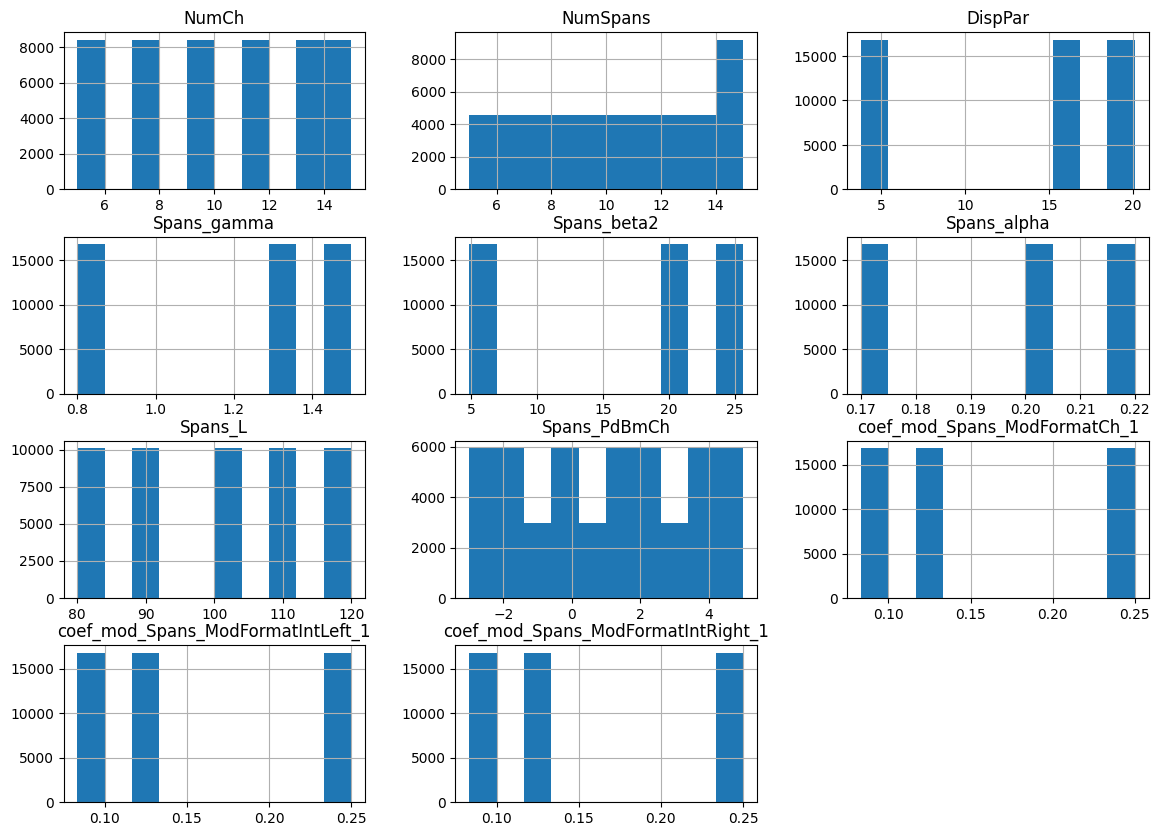

In [16]:
X_features.hist(figsize=(14,10))

array([[<Axes: title={'center': 'NLIN_Power'}>,
        <Axes: title={'center': 'PChOptdBm'}>],
       [<Axes: title={'center': 'OSNRdB_NL'}>,
        <Axes: title={'center': 'BER_NL'}>],
       [<Axes: title={'center': 'OSNRdB'}>,
        <Axes: title={'center': 'BER'}>]], dtype=object)

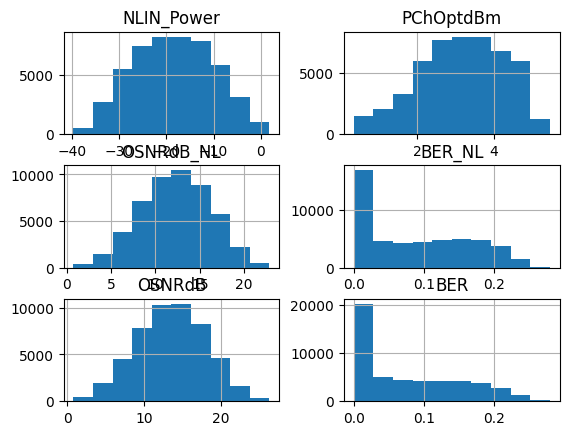

In [19]:
y_features.hist()

# Simulações sem feature scaling

### Estimação da Relação Sinal-Ruído com degradações não lineares (dB)

In [13]:
save_base_path = 'models/KNN/'

### Simulação Isolada

In [14]:
#Intancia do modelo
model_knn_OSNRdB_NL = KNeighborsRegressor(n_neighbors=5)

In [15]:
#Separação entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.3)

In [16]:
model_knn_OSNRdB_NL.fit(X_train, y_train.OSNRdB_NL)
#dump(model_knn_OSNRdB_NL, save_base_path + 'modelo_KNN_OSNRdB_NL.joblib')

df_knn_OSRNdBNL = y_test.copy()[['OSNRdB_NL']]
df_knn_OSRNdBNL['Spans_PdBmCh'] = X_test['Spans_PdBmCh']
df_knn_OSRNdBNL['OSNRdB_NL_pred'] = model_knn_OSNRdB_NL.predict(X_test)
results = model_evaluation(df_knn_OSRNdBNL['OSNRdB_NL_pred'], df_knn_OSRNdBNL['OSNRdB_NL'], X_test)
results

{'R²': 0.99604,
 'R²a': 0.99604,
 'MSE': 0.05981,
 'RMSE': 0.24456,
 'MAE': 0.16532}

In [17]:
for key, value in results.items():
    results[key] = round(value,3)

c:\Users\Victor\Documents\UFPE\transmission_quality_in_optical_networks\utils.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


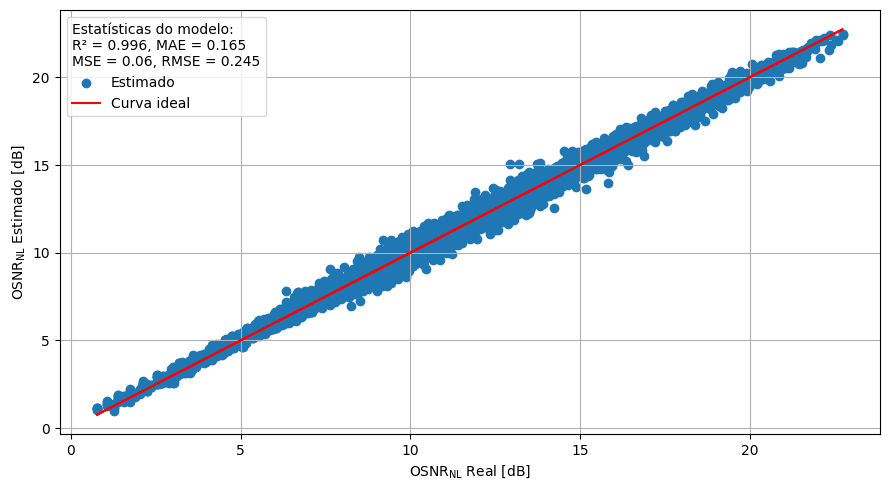

In [18]:
plot_scatter_comp(df_knn_OSRNdBNL, 'OSNRdB_NL', results, figsize=(9,5))

In [19]:
df_to_plot_predict = X_test.copy()
df_to_plot_predict['OSNRdB_NL'] = y_test['OSNRdB_NL']
df_to_plot_predict['OSNRdB_NL_pred'] = df_knn_OSRNdBNL['OSNRdB_NL_pred']

In [20]:
#PSFC
DispPar = 3.8
df_filtrado = df_to_plot_predict[df_to_plot_predict['DispPar'] == DispPar]

#campo para plotagem de gráficos de validação
df_to_plot = filtrar(df_filtrado, **{
    'NumCh': 15,
    'Spans_L': 90,
    'NumSpans': 15,
    'coef_mod_Spans_ModFormatCh_1': 1/12,
    'coef_mod_Spans_ModFormatIntLeft_1': 1/12,
    'coef_mod_Spans_ModFormatIntRight_1': 1/12,
    })
df_to_plot.shape

(7, 13)

In [21]:
color_per_fiber = {
    'NZDSF': ['b', 'orange'],
    'SMF': ['g','c'],
    'PSFC': ['r', 'y']
}

modulacao_per_coef = {
    1/12: '64QAM',
    1/8: '16QAM',
    1/4: 'QPSK'
}

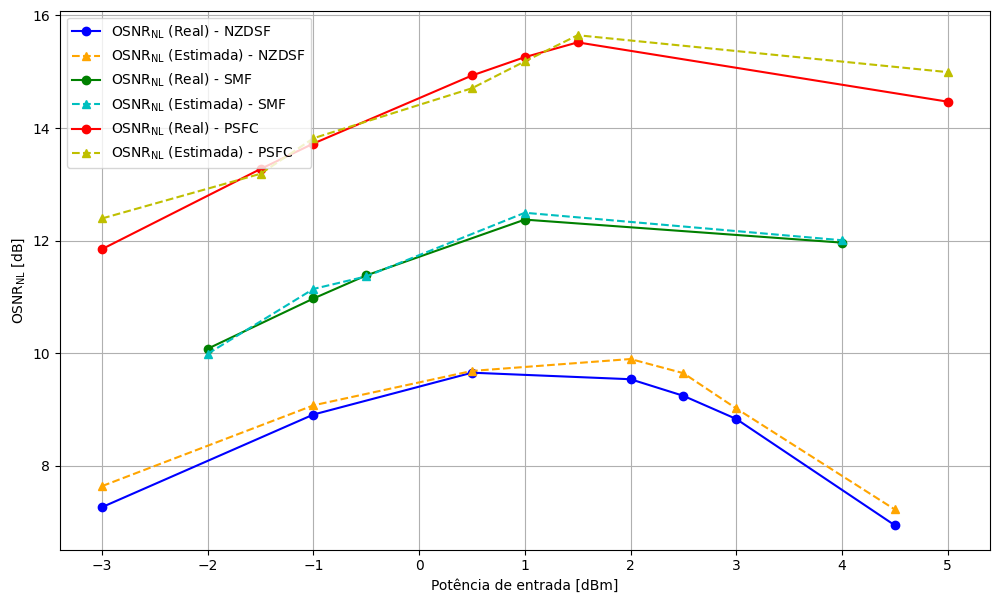

In [22]:
fig, ax = plt.subplots(figsize=(12,7))
for DispPar in [3.8, 16.7, 20.1 ]:   
    df_filtrado = df_to_plot_predict[df_to_plot_predict['DispPar'] == DispPar]
    df_to_plot = filtrar(df_filtrado, **{
        'NumCh': 15,
        'Spans_L': 90,
        'NumSpans': 15,
        'coef_mod_Spans_ModFormatCh_1': 1/12,
        'coef_mod_Spans_ModFormatIntLeft_1': 1/12,
        'coef_mod_Spans_ModFormatIntRight_1': 1/12,
        })
    df_to_plot=df_to_plot.sort_values(by='Spans_PdBmCh')
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL'], label=f'{osnr_label} (Real) - {DisPar_to_Fiber[DispPar]}', marker='o', color=color_per_fiber[DisPar_to_Fiber[DispPar]][0])
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL_pred'], linestyle='--', label=f'{osnr_label} (Estimada) - {DisPar_to_Fiber[DispPar]}', marker='^', color=color_per_fiber[DisPar_to_Fiber[DispPar]][1])

ax.set(xlabel='Potência de entrada [dBm]', ylabel= osnr_label + ' [dB]')
ax.legend(loc='upper left')
ax.grid()
plt.show()

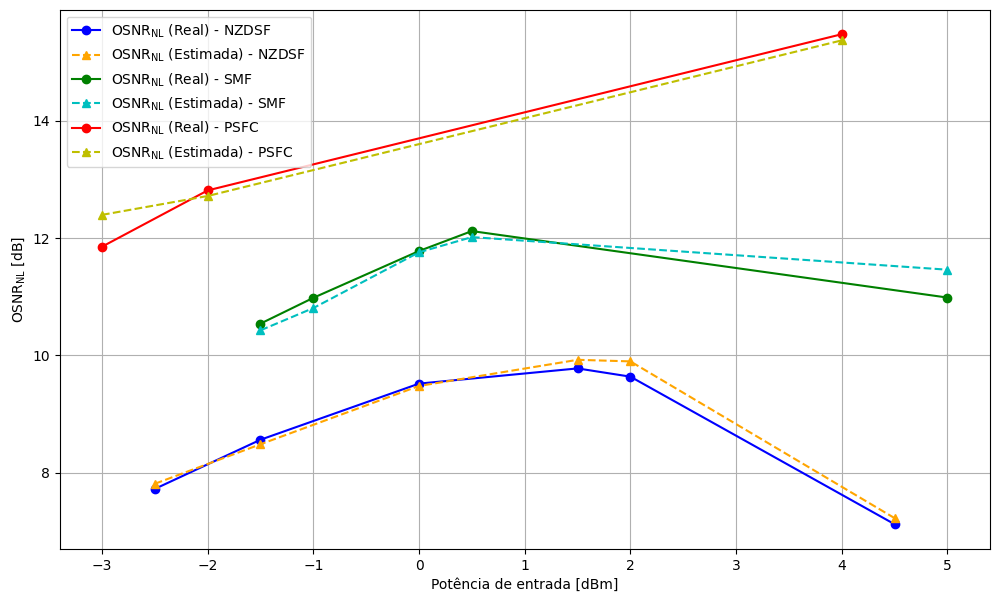

In [23]:
fig, ax = plt.subplots(figsize=(12,7))
for DispPar in [3.8, 16.7, 20.1 ]:   
    df_filtrado = df_to_plot_predict[df_to_plot_predict['DispPar'] == DispPar]
    df_to_plot = filtrar(df_filtrado, **{
        'NumCh': 15,
        'Spans_L': 90,
        'NumSpans': 15,
        'coef_mod_Spans_ModFormatCh_1': 1/8,
        'coef_mod_Spans_ModFormatIntLeft_1': 1/8,
        'coef_mod_Spans_ModFormatIntRight_1': 1/8,
        })
    df_to_plot=df_to_plot.sort_values(by='Spans_PdBmCh')
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL'], label=f'{osnr_label} (Real) - {DisPar_to_Fiber[DispPar]}', marker='o', color=color_per_fiber[DisPar_to_Fiber[DispPar]][0])
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL_pred'], linestyle='--', label=f'{osnr_label} (Estimada) - {DisPar_to_Fiber[DispPar]}', marker='^', color=color_per_fiber[DisPar_to_Fiber[DispPar]][1])

ax.set(xlabel='Potência de entrada [dBm]', ylabel= osnr_label + ' [dB]')
ax.legend(loc='upper left')
ax.grid()
plt.show()

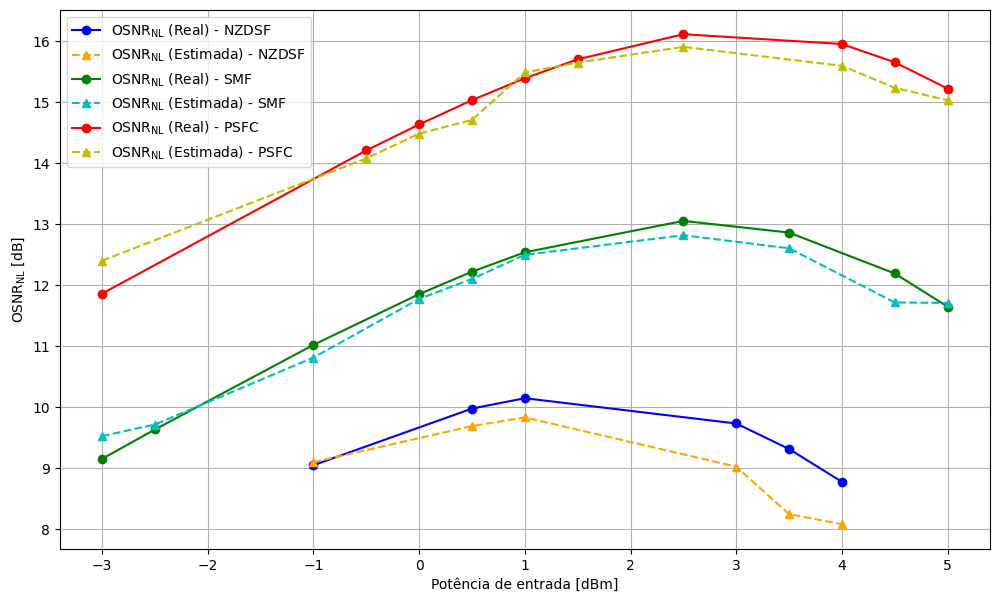

In [24]:
fig, ax = plt.subplots(figsize=(12,7))
osnr_label = r'$\mathrm{OSNR}_{\mathrm{NL}}$'
for DispPar in [3.8, 16.7, 20.1 ]:   
    df_filtrado = df_to_plot_predict[df_to_plot_predict['DispPar'] == DispPar]
    df_to_plot = filtrar(df_filtrado, **{
        'NumCh': 15,
        'Spans_L': 90,
        'NumSpans': 15,
        'coef_mod_Spans_ModFormatCh_1': 1/4,
        'coef_mod_Spans_ModFormatIntLeft_1': 1/4,
        'coef_mod_Spans_ModFormatIntRight_1': 1/4,
        })
    df_to_plot=df_to_plot.sort_values(by='Spans_PdBmCh')
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL'], label=f'{osnr_label} (Real) - {DisPar_to_Fiber[DispPar]}', marker='o', color=color_per_fiber[DisPar_to_Fiber[DispPar]][0])
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL_pred'], linestyle='--', label=f'{osnr_label} (Estimada) - {DisPar_to_Fiber[DispPar]}', marker='^', color=color_per_fiber[DisPar_to_Fiber[DispPar]][1])

ax.set(xlabel='Potência de entrada [dBm]', ylabel= osnr_label + ' [dB]')
ax.legend(loc='upper left')
ax.grid()
plt.show()

#### Conjunto de validação

In [25]:
df_validation = pd.read_csv(r'data\Pchanel_variation.csv')

for channel in string_features:
  for key in coef_mod.keys():
    df_validation[f'coef_mod_{channel}_{key}'] = df_validation[channel].apply(lambda x: coef_mod[key][x])
features = [feature for feature in df.columns if feature not in output_features+zero_features+string_features+const_input_features]
coef_mod0 = ['coef_mod_Spans_ModFormatCh_0', 'coef_mod_Spans_ModFormatIntLeft_0', 'coef_mod_Spans_ModFormatIntRight_0']
coef_mod1 = ['coef_mod_Spans_ModFormatCh_1', 'coef_mod_Spans_ModFormatIntLeft_1', 'coef_mod_Spans_ModFormatIntRight_1']


In [26]:
#conjunto de validação: 
df_knn_val= df_validation.copy()
OSNRdBs = df_knn_val[output_features].copy()
df_knn_in = df_knn_val[features].drop(columns=coef_mod0)

OSNRdBs['OSNRdB_NL_pred'] = model_knn_OSNRdB_NL.predict(df_knn_in)
model_evaluation(OSNRdBs['OSNRdB_NL_pred'], OSNRdBs['OSNRdB_NL'], X_train)

{'R²': 0.74219,
 'R²a': 0.72363,
 'MSE': 3.50713,
 'RMSE': 1.87273,
 'MAE': 1.06918}

#### Validação Cruzada

In [28]:
knn_regressor_OSNRdBNL = KNeighborsRegressor(n_neighbors=5)

In [29]:
scores_cross_validation_KNN_OSNRdBNL = crossval_scores(knn_regressor_OSNRdBNL, X_features, y_features.OSNRdB_NL)
scores_cross_validation_KNN_OSNRdBNL

Score for fold 1: {'R²': 0.99642, 'R²a': 0.99642, 'MSE': 0.05414, 'RMSE': 0.23268, 'MAE': 0.15532}
Score for fold 2: {'R²': 0.99665, 'R²a': 0.99665, 'MSE': 0.05207, 'RMSE': 0.22819, 'MAE': 0.15427}
Score for fold 3: {'R²': 0.9963, 'R²a': 0.9963, 'MSE': 0.05562, 'RMSE': 0.23583, 'MAE': 0.1584}
Score for fold 4: {'R²': 0.99644, 'R²a': 0.99643, 'MSE': 0.05465, 'RMSE': 0.23377, 'MAE': 0.1567}
Score for fold 5: {'R²': 0.99668, 'R²a': 0.99668, 'MSE': 0.05209, 'RMSE': 0.22822, 'MAE': 0.15501}


{'R²': [0.99642, 0.99665, 0.9963, 0.99644, 0.99668],
 'MAE': [0.15532, 0.15427, 0.1584, 0.1567, 0.15501],
 'MSE': [0.05414, 0.05207, 0.05562, 0.05465, 0.05209],
 'MEAN_MAE': 0.15594,
 'MEAN_MSE': 0.053714,
 'MEAN_R2': 0.9964980000000001}

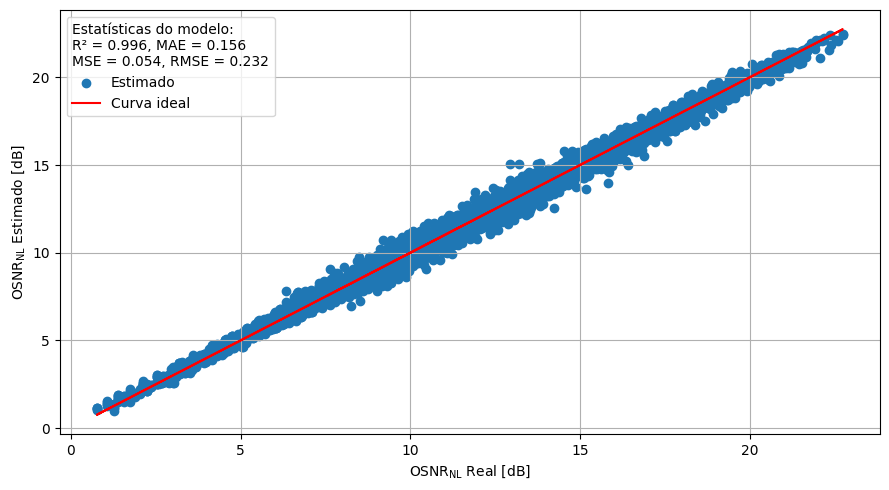

In [44]:
results_cv = {
    'R²': round(scores_cross_validation_KNN_OSNRdBNL['MEAN_R2'], 3),
    'MSE': round(scores_cross_validation_KNN_OSNRdBNL['MEAN_MSE'], 3),
    'MAE': round(scores_cross_validation_KNN_OSNRdBNL['MEAN_MAE'], 3)
}
plot_scatter_comp(df_knn_OSRNdBNL, 'OSNRdB_NL', results_cv, figsize=(9,5))

c:\Users\Victor\Documents\UFPE\transmission_quality_in_optical_networks\utils.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


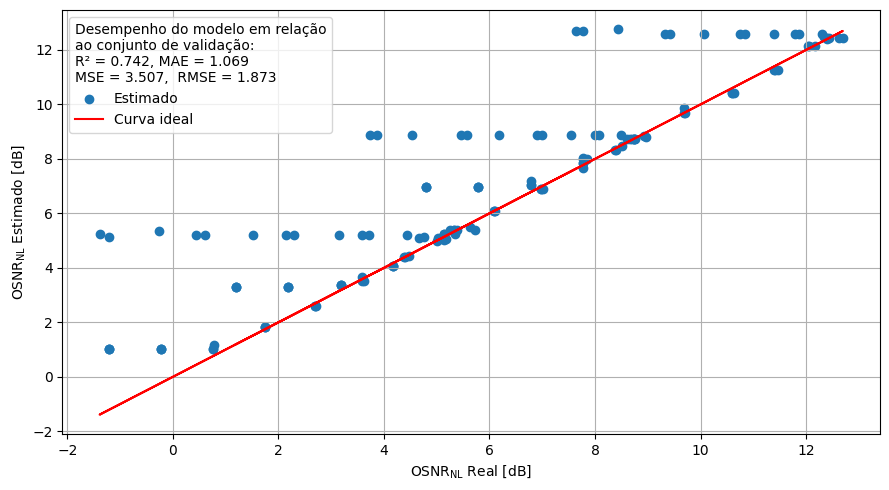

In [45]:
df_validation = pd.read_csv(r'data\Pchanel_variation.csv')

for channel in string_features:
  for key in coef_mod.keys():
    df_validation[f'coef_mod_{channel}_{key}'] = df_validation[channel].apply(lambda x: coef_mod[key][x])
features = [feature for feature in df.columns if feature not in output_features+zero_features+string_features+const_input_features]
coef_mod0 = ['coef_mod_Spans_ModFormatCh_0', 'coef_mod_Spans_ModFormatIntLeft_0', 'coef_mod_Spans_ModFormatIntRight_0']
coef_mod1 = ['coef_mod_Spans_ModFormatCh_1', 'coef_mod_Spans_ModFormatIntLeft_1', 'coef_mod_Spans_ModFormatIntRight_1']


#conjunto de validação: 
df_knn_val= df_validation.copy()
NLIN_Powers = df_knn_val[output_features].copy()
df_knn_in = df_knn_val[features].drop(columns=coef_mod0)

NLIN_Powers['OSNRdB_NL_pred'] = model_knn_OSNRdB_NL.predict(df_knn_in)
results_val = model_evaluation(NLIN_Powers['OSNRdB_NL_pred'], NLIN_Powers['OSNRdB_NL'], X_train)

for key, value in results_val.items():
    results_val[key] = round(value, 3)

plot_scatter_comp(NLIN_Powers, 'OSNRdB_NL', results_val, figsize=(9,5), validation_mode=True)

### KNN - Estimação da Potência do ruído não linear (dB)


#### Simulação Isolada

In [31]:
model_knn_NLIN = KNeighborsRegressor(n_neighbors=5)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.3)
model_knn_NLIN.fit(X_train, y_train.NLIN_Power)
#dump(model_knn_NLIN, save_base_path + 'modelo_KNN_NLIN.joblib')
df_knn_NLIN = y_test.copy()[['NLIN_Power']]

In [33]:
df_knn_NLIN['NLIN_Power_pred'] = model_knn_NLIN.predict(X_test)
model_evaluation(df_knn_NLIN['NLIN_Power_pred'], df_knn_NLIN['NLIN_Power'], X_test)

{'R²': 0.99164,
 'R²a': 0.99164,
 'MSE': 0.59581,
 'RMSE': 0.77188,
 'MAE': 0.61463}

In [34]:
df[output_features].columns

Index(['NLIN_Power', 'PChOptdBm', 'OSNRdB_NL', 'BER_NL', 'OSNRdB', 'BER'], dtype='object')

In [35]:
df_to_plot_predict = X_test.copy()
df_to_plot_predict['NLIN_Power'] = y_test['NLIN_Power']
df_to_plot_predict['NLIN_Power_pred'] = df_knn_NLIN['NLIN_Power_pred']

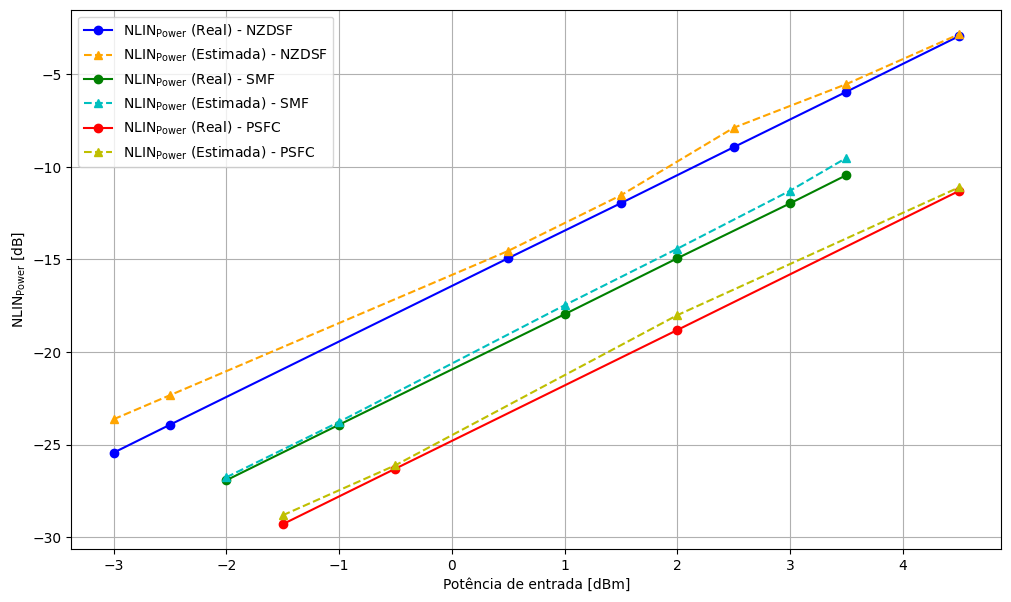

In [36]:
fig, ax = plt.subplots(figsize=(12,7))
for DispPar in [3.8, 16.7, 20.1 ]:   
    df_filtrado = df_to_plot_predict[df_to_plot_predict['DispPar'] == DispPar]
    df_to_plot = filtrar(df_filtrado, **{
        'NumCh': 7,
        'Spans_L': 110,
        #'Spans_PdBmCh': 2
        'NumSpans': 13,
        'coef_mod_Spans_ModFormatCh_1': 1/4,
        'coef_mod_Spans_ModFormatIntLeft_1': 1/4,
        'coef_mod_Spans_ModFormatIntRight_1': 1/4,
        })
    df_to_plot=df_to_plot.sort_values(by='Spans_PdBmCh')
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['NLIN_Power'], label=f'{nlin_label} (Real) - {DisPar_to_Fiber[DispPar]}', marker='o', color=color_per_fiber[DisPar_to_Fiber[DispPar]][0])
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['NLIN_Power_pred'], linestyle='--', label=f'{nlin_label} (Estimada) - {DisPar_to_Fiber[DispPar]}', marker='^', color=color_per_fiber[DisPar_to_Fiber[DispPar]][1])

ax.set(xlabel='Potência de entrada [dBm]', ylabel= f'{nlin_label} [dB]')
ax.legend(loc='upper left')
ax.grid()
plt.show()

#### Validação Cruzada

In [37]:

knn_regressor_NLIN = KNeighborsRegressor(n_neighbors=5)

In [38]:
scores_cross_validation_KNN_NLIN = crossval_scores(knn_regressor_NLIN, X_features, y_features.NLIN_Power)
scores_cross_validation_KNN_NLIN

Score for fold 1: {'R²': 0.99281, 'R²a': 0.9928, 'MSE': 0.51292, 'RMSE': 0.71619, 'MAE': 0.57046}
Score for fold 2: {'R²': 0.99274, 'R²a': 0.99273, 'MSE': 0.51305, 'RMSE': 0.71627, 'MAE': 0.56789}
Score for fold 3: {'R²': 0.99271, 'R²a': 0.99271, 'MSE': 0.50601, 'RMSE': 0.71134, 'MAE': 0.56719}
Score for fold 4: {'R²': 0.99275, 'R²a': 0.99274, 'MSE': 0.51099, 'RMSE': 0.71484, 'MAE': 0.56892}
Score for fold 5: {'R²': 0.99269, 'R²a': 0.99268, 'MSE': 0.52126, 'RMSE': 0.72198, 'MAE': 0.5733}


{'R²': [0.99281, 0.99274, 0.99271, 0.99275, 0.99269],
 'MAE': [0.57046, 0.56789, 0.56719, 0.56892, 0.5733],
 'MSE': [0.51292, 0.51305, 0.50601, 0.51099, 0.52126],
 'MEAN_MAE': 0.5695520000000001,
 'MEAN_MSE': 0.5128459999999999,
 'MEAN_R2': 0.9927399999999998}

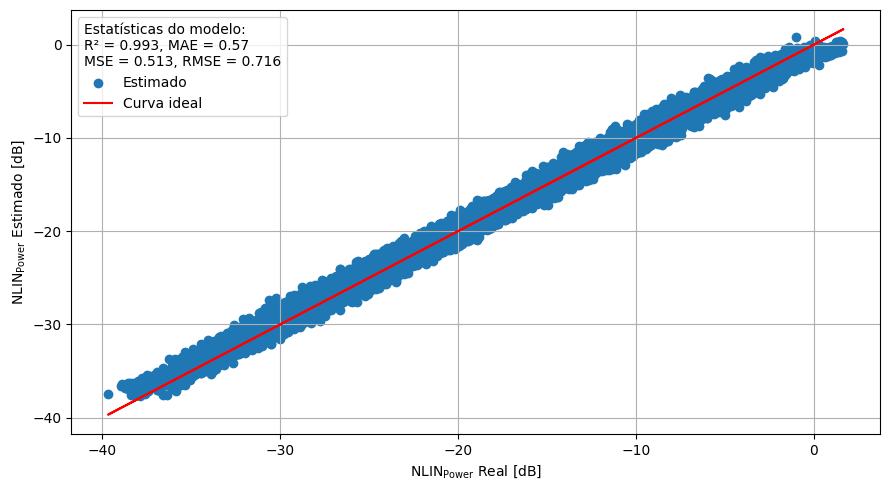

In [46]:
results_cv = {
    'R²': round(scores_cross_validation_KNN_NLIN['MEAN_R2'], 3),
    'MSE': round(scores_cross_validation_KNN_NLIN['MEAN_MSE'], 3),
    'MAE': round(scores_cross_validation_KNN_NLIN['MEAN_MAE'], 3)
}
plot_scatter_comp(df_knn_NLIN, 'NLIN_Power', results_cv, figsize=(9,5))

In [47]:
df_validation = pd.read_csv(r'data\Pchanel_variation.csv')

for channel in string_features:
  for key in coef_mod.keys():
    df_validation[f'coef_mod_{channel}_{key}'] = df_validation[channel].apply(lambda x: coef_mod[key][x])
features = [feature for feature in df.columns if feature not in output_features+zero_features+string_features+const_input_features]
coef_mod0 = ['coef_mod_Spans_ModFormatCh_0', 'coef_mod_Spans_ModFormatIntLeft_0', 'coef_mod_Spans_ModFormatIntRight_0']
coef_mod1 = ['coef_mod_Spans_ModFormatCh_1', 'coef_mod_Spans_ModFormatIntLeft_1', 'coef_mod_Spans_ModFormatIntRight_1']


#conjunto de validação: 
df_knn_val= df_validation.copy()
NLIN_Powers = df_knn_val[output_features].copy()
df_knn_in = df_knn_val[features].drop(columns=coef_mod0)

NLIN_Powers['NLIN_Power_pred'] = model_knn_NLIN.predict(df_knn_in)
results_val = model_evaluation(NLIN_Powers['NLIN_Power_pred'], NLIN_Powers['NLIN_Power'], X_train)


In [48]:
for key, value in results_val.items():
    results_val[key] = round(value, 3)

c:\Users\Victor\Documents\UFPE\transmission_quality_in_optical_networks\utils.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


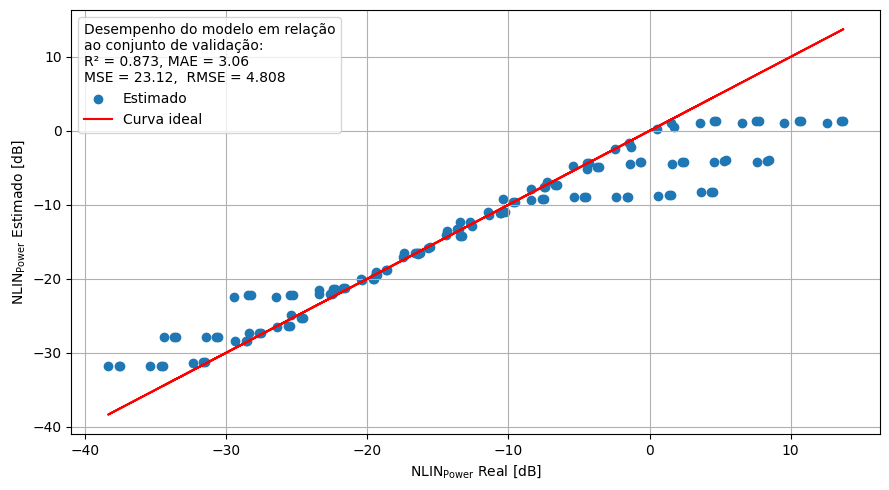

In [49]:
plot_scatter_comp(NLIN_Powers, 'NLIN_Power', results_val, figsize=(9,5), validation_mode=True)

# Simulações com feature scaling

#### Aplicação de métodos de normalização dos atributos e avaliação dos modelos.

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaler = scale.fit(X_features)

In [51]:
X_features_scaled = X_features.copy()

In [52]:
X_features_scaled[X_features.columns] = scaler.transform(X_features)

### Estimação da Relação Sinal-Ruído com degradações não lineares (dB)

#### Simulação Isolado

In [53]:
knn_regressor_OSNRdBNL_scaled = KNeighborsRegressor(n_neighbors=5)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_features, test_size=0.3)
knn_regressor_OSNRdBNL_scaled.fit(X_train, y_train.OSNRdB_NL)
#dump(knn_regressor_OSNRdBNL_scaled, save_base_path + 'modelo_KNN_OSNRdBNL_scaled.joblib')
df_knn_OSNRdBNL_scaled = y_test.copy()[['OSNRdB_NL']]



In [55]:
df_knn_OSNRdBNL_scaled['OSNRdB_NL_pred'] = knn_regressor_OSNRdBNL_scaled.predict(X_test)
model_evaluation(df_knn_OSNRdBNL_scaled['OSNRdB_NL_pred'], df_knn_OSNRdBNL_scaled['OSNRdB_NL'], X_test)

{'R²': 0.99521, 'R²a': 0.99521, 'MSE': 0.07393, 'RMSE': 0.2719, 'MAE': 0.20166}

#### Validação Cruzada

In [56]:
knn_regressor_OSNRdBNL_scaled = KNeighborsRegressor(n_neighbors=5)

In [57]:
scores_cross_validation_KNN_OSNRdBNL = crossval_scores(knn_regressor_OSNRdBNL_scaled, X_features_scaled, y_features.OSNRdB_NL)
scores_cross_validation_KNN_OSNRdBNL

Score for fold 1: {'R²': 0.99576, 'R²a': 0.99576, 'MSE': 0.06478, 'RMSE': 0.25453, 'MAE': 0.19083}
Score for fold 2: {'R²': 0.99563, 'R²a': 0.99563, 'MSE': 0.06722, 'RMSE': 0.25927, 'MAE': 0.19429}
Score for fold 3: {'R²': 0.99563, 'R²a': 0.99563, 'MSE': 0.06738, 'RMSE': 0.25957, 'MAE': 0.19276}
Score for fold 4: {'R²': 0.99551, 'R²a': 0.9955, 'MSE': 0.06858, 'RMSE': 0.26187, 'MAE': 0.19647}
Score for fold 5: {'R²': 0.99559, 'R²a': 0.99558, 'MSE': 0.06775, 'RMSE': 0.26028, 'MAE': 0.19421}


{'R²': [0.99576, 0.99563, 0.99563, 0.99551, 0.99559],
 'MAE': [0.19083, 0.19429, 0.19276, 0.19647, 0.19421],
 'MSE': [0.06478, 0.06722, 0.06738, 0.06858, 0.06775],
 'MEAN_MAE': 0.193712,
 'MEAN_MSE': 0.067142,
 'MEAN_R2': 0.9956240000000001}

c:\Users\Victor\Documents\UFPE\transmission_quality_in_optical_networks\utils.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


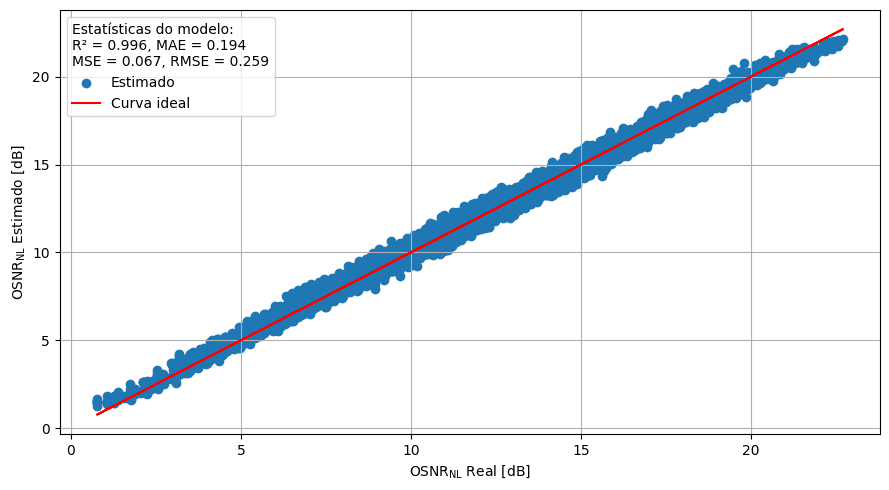

In [58]:
results_cv = {
    'R²': round(scores_cross_validation_KNN_OSNRdBNL['MEAN_R2'], 3),
    'MSE': round(scores_cross_validation_KNN_OSNRdBNL['MEAN_MSE'], 3),
    'MAE': round(scores_cross_validation_KNN_OSNRdBNL['MEAN_MAE'], 3)
}
plot_scatter_comp(df_knn_OSNRdBNL_scaled, 'OSNRdB_NL', results_cv, figsize=(9,5), validation_mode=False)

In [61]:
df_to_plot_predict = X_test.copy()
df_to_plot_predict.loc[X_test.index] = df_knn[features].drop(columns=coef_mod0)
df_to_plot_predict['OSNRdB_NL'] = y_test['OSNRdB_NL']
df_to_plot_predict['OSNRdB_NL_pred'] = df_knn_OSNRdBNL_scaled['OSNRdB_NL_pred']

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
for DispPar in [3.8, 16.7, 20.1 ]:   
    df_filtrado = df_to_plot_predict[df_to_plot_predict['DispPar'] == DispPar]
    df_to_plot = filtrar(df_filtrado, **{
        'NumCh': 13,
        'Spans_L': 120,
        'NumSpans': 5,
        'coef_mod_Spans_ModFormatCh_1': 1/4,
        'coef_mod_Spans_ModFormatIntLeft_1': 1/4,
        'coef_mod_Spans_ModFormatIntRight_1': 1/4,
        })
    df_to_plot=df_to_plot.sort_values(by='Spans_PdBmCh')
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL'], label=f'{osnr_label} (Real) - {DisPar_to_Fiber[DispPar]}', marker='o', color=color_per_fiber[DisPar_to_Fiber[DispPar]][0])
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL_pred'], linestyle='--', label=f'{osnr_label} (Estimada) - {DisPar_to_Fiber[DispPar]}', marker='^', color=color_per_fiber[DisPar_to_Fiber[DispPar]][1])

ax.set(xlabel='Potência de entrada [dBm]', ylabel= osnr_label + ' [dB]')
ax.legend(loc='upper left')
ax.grid()
plt.show()

In [63]:
df_validation = pd.read_csv(r'data\Pchanel_variation.csv')

for channel in string_features:
  for key in coef_mod.keys():
    df_validation[f'coef_mod_{channel}_{key}'] = df_validation[channel].apply(lambda x: coef_mod[key][x])
features = [feature for feature in df.columns if feature not in output_features+zero_features+string_features+const_input_features]
coef_mod0 = ['coef_mod_Spans_ModFormatCh_0', 'coef_mod_Spans_ModFormatIntLeft_0', 'coef_mod_Spans_ModFormatIntRight_0']
coef_mod1 = ['coef_mod_Spans_ModFormatCh_1', 'coef_mod_Spans_ModFormatIntLeft_1', 'coef_mod_Spans_ModFormatIntRight_1']



In [64]:
df_knn_in = df_validation[features].copy().drop(columns=coef_mod0)
#conjunto de validação: 
OSNRdBs_scaled = df_validation[output_features].copy()

df_knn_in_scaled = df_knn_in.copy()
df_knn_in_scaled[df_knn_in_scaled.columns] = scaler.transform(df_knn_in)


In [65]:
df_knn_in_scaled.head()

,NumCh,NumSpans,DispPar,Spans_gamma,Spans_beta2,Spans_alpha,Spans_L,Spans_PdBmCh,coef_mod_Spans_ModFormatCh_1,coef_mod_Spans_ModFormatIntLeft_1,coef_mod_Spans_ModFormatIntRight_1
0,1.463825,1.581108,0.451034,0.339691,0.451034,0.162225,1.414186,-2.449475,1.372774,1.372774,1.372774
1,1.463825,1.581108,0.451034,0.339691,0.451034,0.162225,1.414186,-2.041220,1.372774,1.372774,1.372774
2,1.463825,1.581108,0.451034,0.339691,0.451034,0.162225,1.414186,-1.632966,1.372774,1.372774,1.372774
3,1.463825,1.581108,0.451034,0.339691,0.451034,0.162225,1.414186,-1.224711,1.372774,1.372774,1.372774
4,1.463825,1.581108,0.451034,0.339691,0.451034,0.162225,1.414186,-0.816456,1.372774,1.372774,1.372774


In [66]:
OSNRdBs_scaled['OSNRdB_NL_pred'] = knn_regressor_OSNRdBNL_scaled.predict(df_knn_in_scaled)

In [67]:
results_osnr_val = model_evaluation(OSNRdBs_scaled['OSNRdB_NL_pred'], OSNRdBs_scaled['OSNRdB_NL'], X_train)

In [68]:
for key, value in results_osnr_val.items():
    results_osnr_val[key] = round(value, 3)

c:\Users\Victor\Documents\UFPE\transmission_quality_in_optical_networks\utils.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


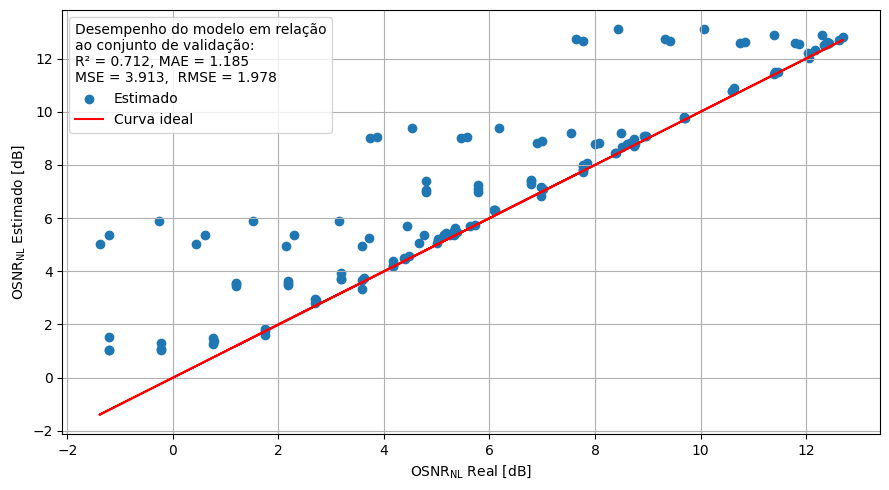

In [69]:
plot_scatter_comp(OSNRdBs_scaled, 'OSNRdB_NL', results_osnr_val, figsize=(9,5), validation_mode=True)

In [128]:
df_val = pd.read_csv(r'data\Pchanel_variation.csv')

for channel in string_features:
  for key in coef_mod.keys():
    df[f'coef_mod_{channel}_{key}'] = df[channel].apply(lambda x: coef_mod[key][x])
    df_val[f'coef_mod_{channel}_{key}'] = df_val[channel].apply(lambda x: coef_mod[key][x])

In [129]:
X_validation = df_val[features].drop(columns=coef_mod0)
X_validation2 = X_validation.copy()

X_validation[X_validation.columns] = scaler.transform(X_validation2)

y_validation = df_val[output_features]
y_validation2 = y_validation.copy()
y_validation2['OSNRdB_NL_pred'] = knn_regressor_OSNRdBNL_scaled.predict(X_validation)


df_to_plot_predict = X_validation2.copy()
df_to_plot_predict[output_features + ['OSNRdB_NL_pred']] = y_validation2

result_osnr_scaled_val = model_evaluation(df_to_plot_predict['OSNRdB_NL_pred'], df_to_plot_predict['OSNRdB_NL'], X_train)


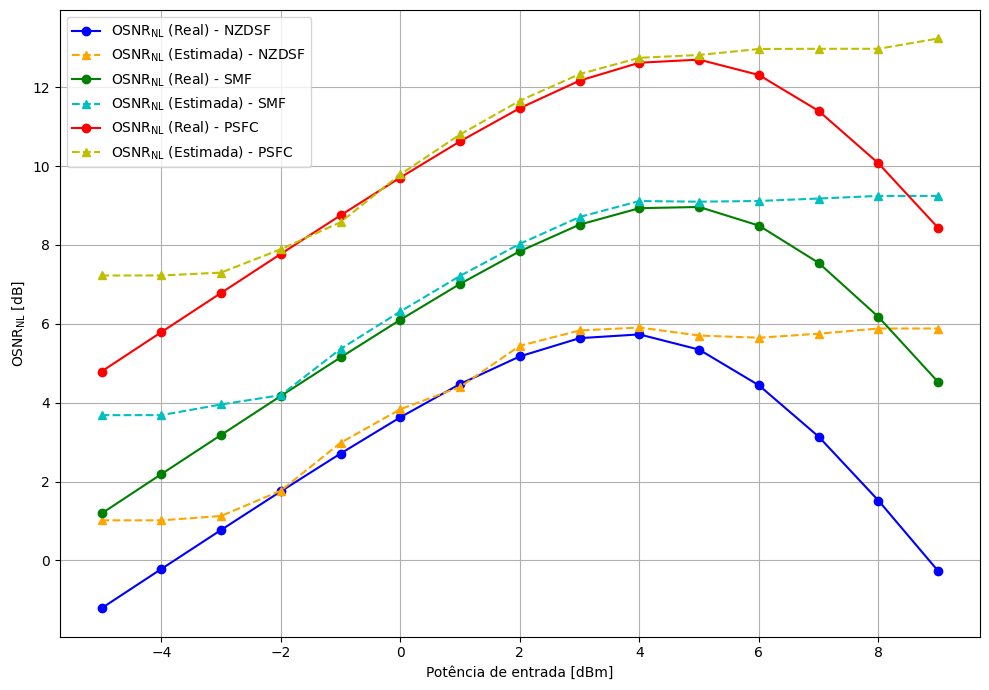

In [131]:
idx = 0
fig, ax = plt.subplots(figsize=(10, 7))
for fiberParam in to_plot_params:
  dfplot = df_to_plot_predict.copy()
  df_to_plot = dfplot[(dfplot['coef_mod_Spans_ModFormatCh_1'] == fiberParam['coef_mod_Spans_ModFormatCh_1']) & (dfplot['DispPar'] == fiberParam['DispPar'])]
  ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL'], label=f'{osnr_label} (Real) - {DisPar_to_Fiber[fiberParam["DispPar"]]}', marker='o', color=color1[idx])
  ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['OSNRdB_NL_pred'], linestyle='--', label=f'{osnr_label} (Estimada) - {DisPar_to_Fiber[fiberParam["DispPar"]]}', marker='^', color=color2[idx])
  ax.legend(loc='upper left')
  idx +=1

ax.set(xlabel=f'Potência de entrada [dBm]', ylabel=f'{osnr_label} [dB]')

fig.tight_layout()
ax.grid()
plt.show()

### KNN - Estimação da Potência do ruído não linear (dB)



#### Simulação Isolada

In [70]:
X_features_scaled = X_features.copy()
X_features_scaled[X_features.columns] = scaler.transform(X_features)

In [71]:
model_knn_NLIN_scaled = KNeighborsRegressor(n_neighbors=5)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_features, test_size=0.3)
model_knn_NLIN_scaled.fit(X_train, y_train.NLIN_Power)
#dump(model_knn_NLIN_scaled, save_base_path + 'modelo_KNN_NLIN_scaled.joblib')
df_knn_NLIN_scaled = y_test.copy()[['NLIN_Power']]



In [73]:
df_knn_NLIN_scaled['NLIN_Power_pred'] = model_knn_NLIN_scaled.predict(X_test)
model_evaluation(df_knn_NLIN_scaled['NLIN_Power_pred'], df_knn_NLIN_scaled['NLIN_Power'], X_test)


{'R²': 0.9923, 'R²a': 0.9923, 'MSE': 0.54532, 'RMSE': 0.73846, 'MAE': 0.55668}

In [74]:
df_to_plot_predict = X_test.copy()
df_to_plot_predict.loc[X_test.index] = df_knn[features].drop(columns=coef_mod0)
df_to_plot_predict['NLIN_Power'] = y_test['NLIN_Power']
df_to_plot_predict['NLIN_Power_pred'] = df_knn_NLIN_scaled['NLIN_Power_pred']

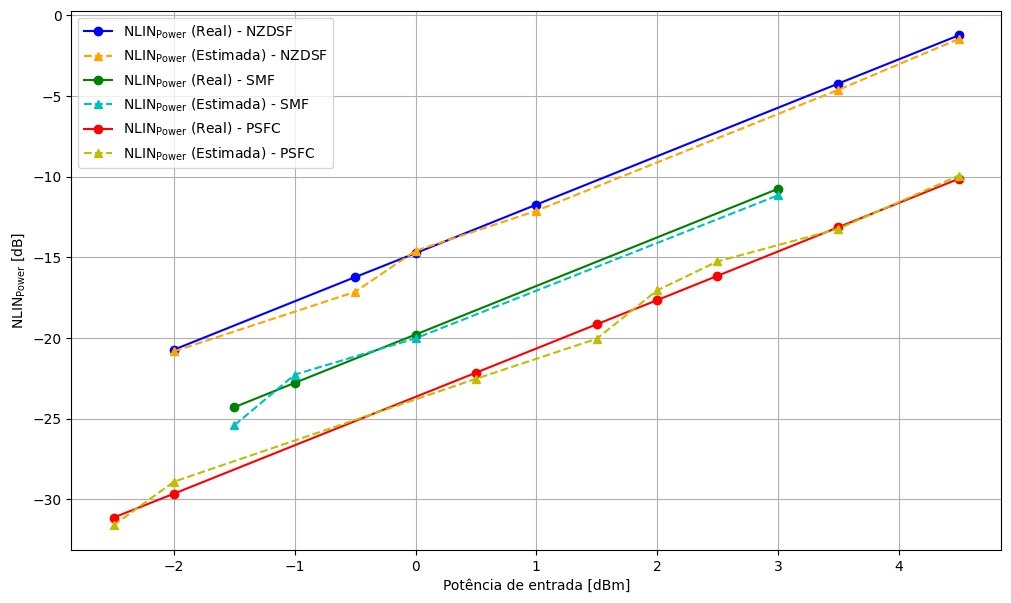

In [75]:
fig, ax = plt.subplots(figsize=(12,7))
for DispPar in [3.8, 16.7, 20.1 ]:   
    df_filtrado = df_to_plot_predict[df_to_plot_predict['DispPar'] == DispPar]
    df_to_plot = filtrar(df_filtrado, **{
        'NumCh': 9,
        'Spans_L': 110,
        'NumSpans': 13,
        'coef_mod_Spans_ModFormatCh_1': 1/12,
        'coef_mod_Spans_ModFormatIntLeft_1': 1/12,
        'coef_mod_Spans_ModFormatIntRight_1': 1/12,
        })
    df_to_plot=df_to_plot.sort_values(by='Spans_PdBmCh')
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['NLIN_Power'], label=f'{nlin_label} (Real) - {DisPar_to_Fiber[DispPar]}', marker='o', color=color_per_fiber[DisPar_to_Fiber[DispPar]][0])
    ax.plot(df_to_plot['Spans_PdBmCh'], df_to_plot['NLIN_Power_pred'], linestyle='--', label=f'{nlin_label} (Estimada) - {DisPar_to_Fiber[DispPar]}', marker='^', color=color_per_fiber[DisPar_to_Fiber[DispPar]][1])

ax.set(xlabel='Potência de entrada [dBm]', ylabel= f'{nlin_label} [dB]')
ax.legend(loc='upper left')
ax.grid()
plt.show()

#### Validação Cruzada

In [76]:
knn_regressor_NLIN = KNeighborsRegressor(n_neighbors=5)

In [80]:
scores_cross_validation_KNN_NLIN = crossval_scores(knn_regressor_NLIN, X_features_scaled, y_features.NLIN_Power)
scores_cross_validation_KNN_NLIN

Score for fold 1: {'R²': 0.99359, 'R²a': 0.99359, 'MSE': 0.45524, 'RMSE': 0.67472, 'MAE': 0.51308}
Score for fold 2: {'R²': 0.99357, 'R²a': 0.99357, 'MSE': 0.45376, 'RMSE': 0.67361, 'MAE': 0.51262}
Score for fold 3: {'R²': 0.99369, 'R²a': 0.99369, 'MSE': 0.44398, 'RMSE': 0.66632, 'MAE': 0.50636}
Score for fold 4: {'R²': 0.99348, 'R²a': 0.99348, 'MSE': 0.45629, 'RMSE': 0.67549, 'MAE': 0.51125}
Score for fold 5: {'R²': 0.99387, 'R²a': 0.99387, 'MSE': 0.4353, 'RMSE': 0.65977, 'MAE': 0.50273}


{'R²': [0.99359, 0.99357, 0.99369, 0.99348, 0.99387],
 'MAE': [0.51308, 0.51262, 0.50636, 0.51125, 0.50273],
 'MSE': [0.45524, 0.45376, 0.44398, 0.45629, 0.4353],
 'MEAN_MAE': 0.509208,
 'MEAN_MSE': 0.4489140000000001,
 'MEAN_R2': 0.9936399999999999}

c:\Users\Victor\Documents\UFPE\transmission_quality_in_optical_networks\utils.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


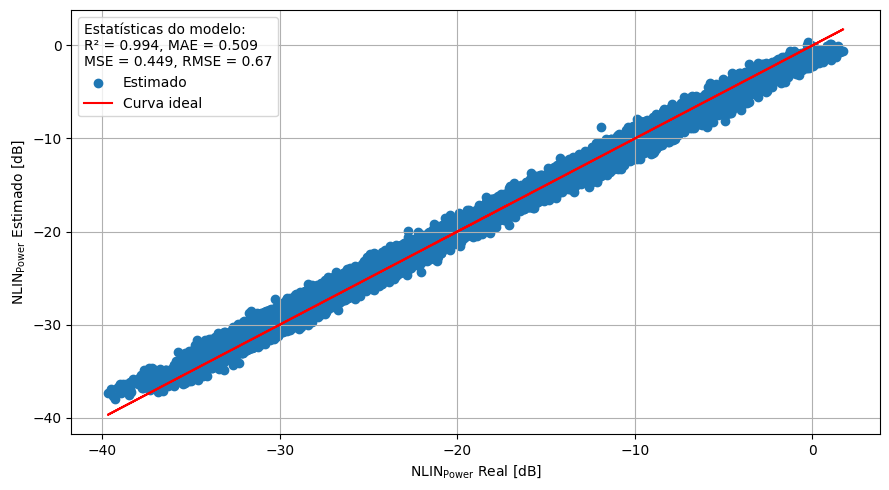

In [81]:
results_cv = {
    'R²': round(scores_cross_validation_KNN_NLIN['MEAN_R2'], 3),
    'MSE': round(scores_cross_validation_KNN_NLIN['MEAN_MSE'], 3),
    'MAE': round(scores_cross_validation_KNN_NLIN['MEAN_MAE'], 3)
}
plot_scatter_comp(df_knn_NLIN_scaled, 'NLIN_Power', results_cv, figsize=(9,5), validation_mode=False)

In [82]:
df_val = pd.read_csv(r'data\Pchanel_variation.csv')
for channel in string_features:
  for key in coef_mod.keys():
    df_val[f'coef_mod_{channel}_{key}'] = df_val[channel].apply(lambda x: coef_mod[key][x])

X_validation = df_val[features].drop(columns=coef_mod0)
X_validation2 = X_validation.copy()

X_validation[X_validation.columns] = scale.transform(X_validation2)
y_validation = df_val[output_features]

y_validation2 = y_validation.copy()
y_validation2['NLIN_Power_pred'] = model_knn_NLIN_scaled.predict(X_validation)

df_to_plot_predict = X_validation2.copy()
df_to_plot_predict[output_features + ['NLIN_Power_pred']] = y_validation2

In [83]:
X_validation.head(1)

,NumCh,NumSpans,DispPar,Spans_gamma,Spans_beta2,Spans_alpha,Spans_L,Spans_PdBmCh,coef_mod_Spans_ModFormatCh_1,coef_mod_Spans_ModFormatIntLeft_1,coef_mod_Spans_ModFormatIntRight_1
0,1.463825,1.581108,0.451034,0.339691,0.451034,0.162225,1.414186,-2.449475,1.372774,1.372774,1.372774


In [84]:
result_nlin_scaled_val = model_evaluation(df_to_plot_predict['NLIN_Power_pred'], df_to_plot_predict['NLIN_Power'], X_train)
for key, value in result_nlin_scaled_val.items():
    result_nlin_scaled_val[key] = round(value, 3)
result_nlin_scaled_val

{'R²': 0.869, 'R²a': 0.86, 'MSE': 23.817, 'RMSE': 4.88, 'MAE': 3.184}

c:\Users\Victor\Documents\UFPE\transmission_quality_in_optical_networks\utils.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


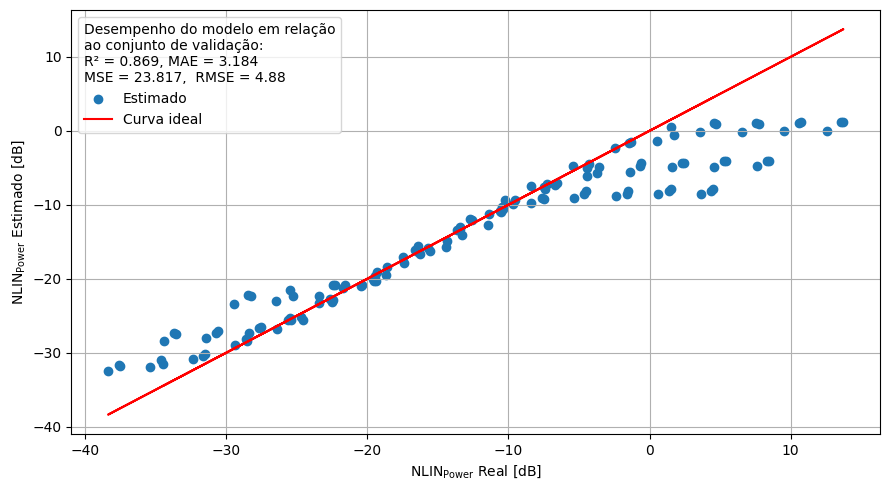

In [85]:
plot_scatter_comp(df_to_plot_predict, 'NLIN_Power', result_nlin_scaled_val, figsize=(9,5), validation_mode=True)

In [150]:
X_validation = df_val[features].drop(columns=coef_mod0)
X_validation2 = X_validation.copy()

X_validation[X_validation.columns] = scaler.transform(X_validation2)

y_validation = df_val[output_features]
y_validation2 = y_validation.copy()
y_validation2['NLIN_Power_pred'] = model_knn_NLIN_scaled.predict(X_validation)


df_to_plot_predict = X_validation2.copy()
df_to_plot_predict[output_features + ['NLIN_Power_pred']] = y_validation2

result_osnr_scaled_val = model_evaluation(df_to_plot_predict['NLIN_Power_pred'], df_to_plot_predict['NLIN_Power'], X_train)
result_osnr_scaled_val

{'R²': 0.87042,
 'R²a': 0.86109,
 'MSE': 23.59603,
 'RMSE': 4.85757,
 'MAE': 3.16744}

In [148]:
X_validation.head(1)

,NumCh,NumSpans,DispPar,Spans_gamma,Spans_beta2,Spans_alpha,Spans_L,Spans_PdBmCh,coef_mod_Spans_ModFormatCh_1,coef_mod_Spans_ModFormatIntLeft_1,coef_mod_Spans_ModFormatIntRight_1
0,1.463825,1.581108,0.451034,0.339691,0.451034,0.162225,1.414186,-2.449475,1.372774,1.372774,1.372774


In [152]:
X_validation.shape

(135, 11)

In [170]:
df_val = pd.read_csv(r'data\Pchanel_variation.csv')
for channel in string_features:
  for key in coef_mod.keys():
    df_val[f'coef_mod_{channel}_{key}'] = df_val[channel].apply(lambda x: coef_mod[key][x])

X_validation = df_val[features].drop(columns=coef_mod0)
X_validation2 = X_validation.copy()

X_validation[X_validation.columns] = scaler.transform(X_validation2)
y_validation = df_val[output_features]

y_validation2 = y_validation.copy()
y_validation2['NLIN_Power_pred'] = model_knn_NLIN_scaled.predict(X_validation)

df2 = X_validation2.copy()
df2[output_features + ['NLIN_Power_pred']] = y_validation2

In [173]:
x_val_nlin = df_val[features].drop(columns=coef_mod0)
x_val_nlin_scaled = x_val_nlin.copy()

x_val_nlin_scaled[x_val_nlin.columns] = scale.transform(x_val_nlin_scaled)

y_val = df_val[output_features]

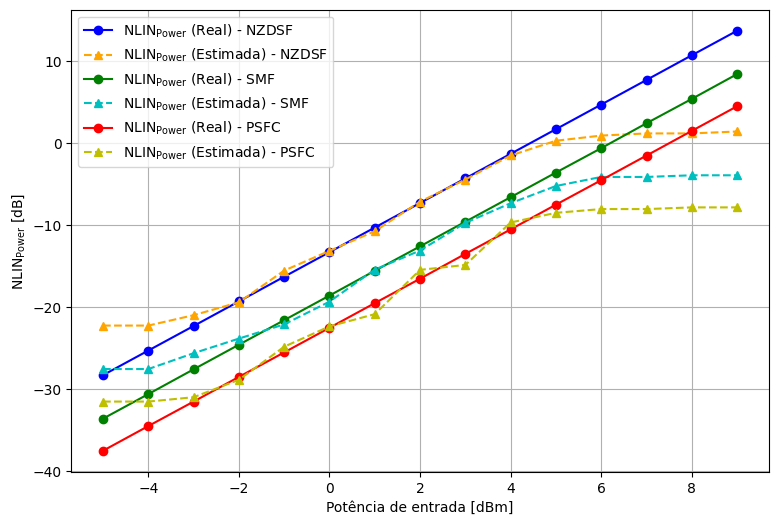

In [174]:
plot_all_fiber_pdBmCh(x_val_nlin_scaled, y_val, model_knn_NLIN_scaled, 'NLIN_Power', x_val_nlin, coef_mod=1/12, L=120, NSpam=15, NCh=15, scaled=True)